In [13]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import cv2

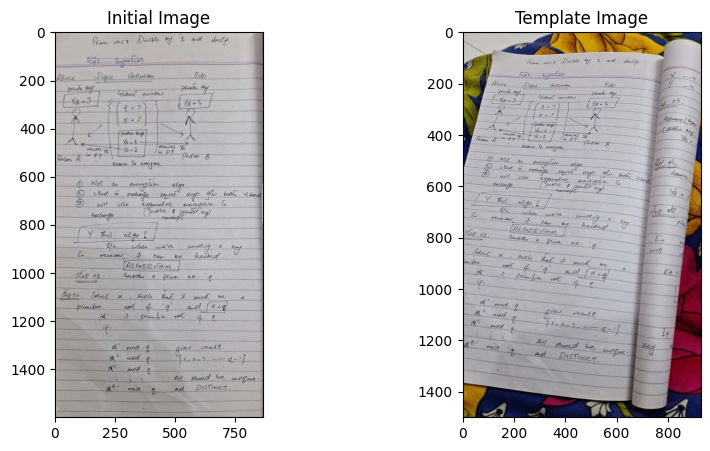

In [14]:
image_path = '/content/WhatsApp Image 2023-12-16 at 01.35.52_a0b2d2b7.jpg'
template_path = '/content/WhatsApp Image 2023-12-16 at 01.35.53_8fea9507.jpg'
# imread image
image = cv2.imread(image_path)
template = cv2.imread(template_path)
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

#initial image
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Initial Image')

#template image
axes[1].imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))
axes[1].set_title('Template Image')
plt.show()

In [15]:
def align_images(image, template, max_features=500, keep_percent=0.2, debug=False):
    #to grayscale
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

    # ORB detector
    orb = cv2.ORB_create(max_features)

    # Find ing keypoints and descriptors
    kpsA, descsA = orb.detectAndCompute(image_gray, None)
    kpsB, descsB = orb.detectAndCompute(template_gray, None)

    # Matching descriptors using Brute Force Hamming
    method = cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING
    matcher = cv2.DescriptorMatcher_create(method)
    matches = matcher.match(descsA, descsB, None)
    matches = sorted(matches, key=lambda x: x.distance)
    #Keeping only best matches
    keep = int(len(matches) * keep_percent)
    matches = matches[:keep]
    if debug:
        matched_vis = cv2.drawMatches(image, kpsA, template, kpsB, matches, None)
        matched_vis = cv2.resize(matched_vis, (1000, int(1000 * (matched_vis.shape[0] / matched_vis.shape[1]))))
        cv2.imshow("Matched Keypoints (ORB)", matched_vis)
        cv2.waitKey(0)

    # getting matched keypoints
    ptsA = np.zeros((len(matches), 2), dtype="float32")
    ptsB = np.zeros((len(matches), 2), dtype="float32")

    for i, match in enumerate(matches):
        ptsA[i] = kpsA[match.queryIdx].pt
        ptsB[i] = kpsB[match.trainIdx].pt

    #homography matrix using RANSAC
    H, mask = cv2.findHomography(ptsA, ptsB, method=cv2.RANSAC)

    # Apply the homography to align the images
    h, w = template.shape[:2]
    aligned = cv2.warpPerspective(image, H, (w, h))

    return aligned

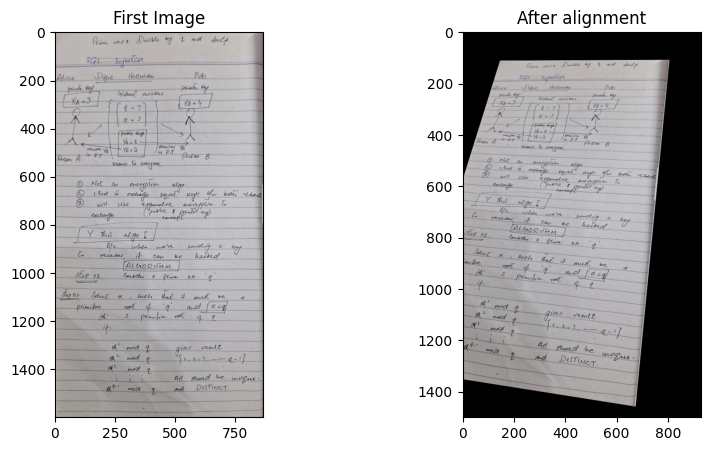

In [16]:
aligned_image = align_images(image, template)
# displaying
imagesfig, axes = plt.subplots(1, 2, figsize=(10, 5))

#original image
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('First Image')

# aligned image
axes[1].imshow(cv2.cvtColor(aligned_image, cv2.COLOR_BGR2RGB))
axes[1].set_title('After alignment')
plt.show()